# Notebook to QC Section 2.3 that relates time rate of change of tracer variance through the lateral boundaries of control volume. I expect these terms to close with a small residual similar to 'QC_diffusion'

In [2]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from xhistogram.xarray import histogram
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 11})
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
%matplotlib inline
from datetime import datetime

# Open output 

In [3]:
#Tendency terms - all in .npy format
ds2dt = np.load('/d2/home/dylan/JAMES/budget_outputs/tendency/ds2dt_parent_ver1_2010.npy')
dsprime2dt = np.load('/d2/home/dylan/JAMES/budget_outputs/tendency/dsprime2dt_ver1_parent_2010.npy')
dsbar2dt = np.load('/d2/home/dylan/JAMES/budget_outputs/tendency/dsbar2dt_parent_ver1_2010.npy')
dsbarsprimedt = np.load('/d2/home/dylan/JAMES/budget_outputs/tendency/dsbarsprimedt1_parent_ver1_2010.npy')

#Open another variable to extract time 
s2_advection = xr.open_mfdataset('/d2/home/dylan/JAMES/budget_outputs/advection/saltsquareadv_parent_ver1_2010_*.nc').__xarray_dataarray_variable__.sel(ocean_time = slice('2010-06-03', '2010-07-13'))[1:-1]
time = s2_advection.ocean_time.values

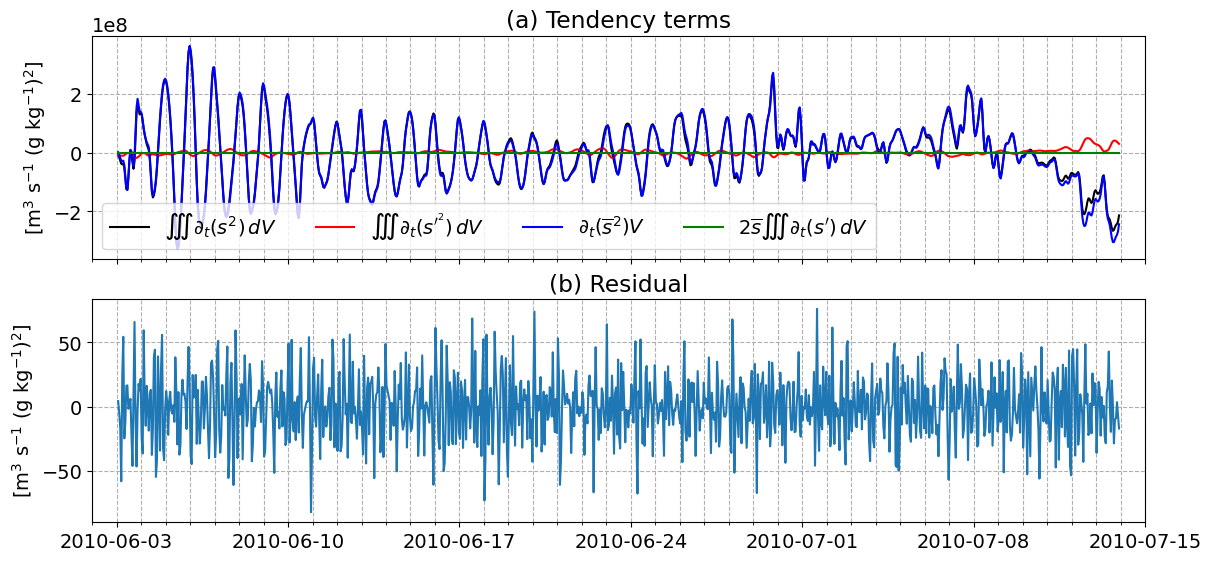

In [9]:
plt.rcParams.update({'font.size': 14})

myFmt = mdates.DateFormatter("%Y-%m-%d")
dates = ['2010-06-03', '2010-06-10', '2010-06-17', '2010-06-24',
         '2010-07-01', '2010-07-08', '2010-07-15']
#Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

fig, ax = plt.subplots(2,1, figsize = (12,2.75*2), constrained_layout = True, sharey = False)

ax[0].plot(time, ds2dt, lw = 1.5, c = 'k', label = r'$\iiint \partial_t(s^2) \, dV$')
ax[0].plot(time, dsprime2dt, lw = 1.5, c = 'r', label = r'$\iiint \partial_t(s^{\prime^2}) \, dV$')
ax[0].plot(time, dsbar2dt, lw = 1.5, c = 'b', label = r'$\partial_t(\overline{s}^2)V$')
ax[0].plot(time, dsbarsprimedt, lw = 1.5, c = 'g', label = r'$2 \overline{s} \iiint \partial_t(s^{\prime}) \, dV$')
ax[0].set_title('(a) Tendency terms')
ax[0].legend(loc = 'lower left', ncol = 4)
ax[0].set_xlim(datetime(2010,6,2), datetime(2010,7,15))
ax[0].set_ylabel(r'[m$^3$ s$^{-1}$ (g kg$^{-1}$)$^2$]')
ax[0].set_xticks(ticks = dates)
ax[0].grid(linestyle = '--')
ax[0].set_xlabel('')
ax[0].set_xticklabels([])

ax[1].plot(time, ds2dt-(dsprime2dt+dsbar2dt+dsbarsprimedt), lw = 1.5)
ax[1].set_title('(b) Residual')
ax[1].grid(linestyle = '--')
ax[1].set_xlabel('Time [hrs]')
ax[1].set_ylabel(r'[m$^3$ s$^{-1}$ (g kg$^{-1}$)$^2$]')
ax[1].set_xlim(datetime(2010,6,2), datetime(2010,7,15))
ax[1].set_xticks(ticks = dates)
ax[1].grid(linestyle = '--')
ax[1].set_xlabel('')
ax[1].set_xticklabels([])
ax[1].xaxis.set_major_formatter(myFmt)

for i in range(2):
    ax[i].xaxis.set_minor_locator(mdates.DayLocator())
    ax[i].xaxis.grid(True, which = 'both', linestyle = '--')
    
# plt.savefig('QC_tendency.jpg', dpi = 300, bbox_inches='tight')

# There is a small residual here, not quite as good as the diffusive flux term balance. This could be due to not prescribing double precision, but this is ok given the leading terms are many orders of magnitude larger. 